In [1]:
import numpy as np
import pandas as pd
import re

In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [8]:
df = pd.read_csv('../../prepared_data/missing_value_imputed.csv')

In [9]:
df.duplicated().sum()

np.int64(128)

In [10]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [7]:
df.head(1)
# focus is on -> areaWithType, additionalRoom, agePossession, furnishDetails, features 

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,flat,tulip monsella,sector 53,7.4,33198.0,2229.0,Carpet area: 2229 (207.08 sq.m.),4,4,3,not available,21.0,NaN,Jun 2027,"['Sector 53-54 Metro Station', 'Central Plaza Mall', 'The Big Tree Cafe', 'IILM University, Gurugram', 'The Banyan Tree World School', 'Sanar International Hospital', 'DLF Golf and Country Club', 'Mavens Inn', 'DoubleTree by Hilton Hotel']","['1 Wardrobe', '1 Geyser', '1 Light', '1 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Lift(s)', 'Swimming Pool', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"


## 1. areaWithType

In [6]:
df.sample(5)[['price','area','areaWithType']]

,price,area,areaWithType
266,7.00,3000.0,Plot area 2400(222.97 sq.m.)Built Up area: 3400 sq.ft. (315.87 sq.m.)Carpet area: 3000 sq.ft. (278.71 sq.m.)
1987,2.35,1440.0,Plot area 160(133.78 sq.m.)
3625,1.20,1444.0,Super Built up area 1444(134.15 sq.m.)
606,4.75,4500.0,Built Up area: 4500 (418.06 sq.m.)
1340,2.08,2100.0,Built Up area: 2631 (244.43 sq.m.)Carpet area: 2100 sq.ft. (195.1 sq.m.)


In [7]:
# This function extracts the Super Built up area
def get_super_built_up_area(text):
    
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [8]:
# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [9]:
# This function checks if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [23]:
df = df.dropna(subset=['areaWithType'])

In [24]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [25]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
1186,0.26,NaN,431.0,Super Built up area 431(40.04 sq.m.)Carpet area: 380.44 sq.ft. (35.34 sq.m.),431.0,NaN,380.44
165,3.50,NaN,2054.0,Carpet area: 2054 (190.82 sq.m.),NaN,NaN,2054.00
1175,0.45,NaN,514.0,Carpet area: 514 (47.75 sq.m.),NaN,NaN,514.00
534,0.49,NaN,596.0,Super Built up area 602(55.93 sq.m.)Built Up area: 598 sq.ft. (55.56 sq.m.),602.0,598.0,NaN
3574,11.00,house,4125.0,Plot area 500(418.06 sq.m.),NaN,NaN,NaN


In [26]:
df.duplicated().sum()

122

In [27]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(534, 7)

In [28]:
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
8,8.0,house,3042.0,Plot area 338(282.61 sq.m.),NaN,NaN,NaN
9,3.1,house,1548.0,Plot area 172(143.81 sq.m.),NaN,NaN,NaN
10,NaN,house,NaN,Plot area 520(434.79 sq.m.),NaN,NaN,NaN
13,8.5,house,6300.0,Plot area 6300(585.29 sq.m.),NaN,NaN,NaN
20,1.1,house,200.0,Plot area 200(18.58 sq.m.),NaN,NaN,NaN


In [29]:
df.isnull().sum()

society                   1
price                    17
sector                    0
price_per_sqft           17
area                     17
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          980
features                635
property_type          2942
super_built_up_area    1887
built_up_area          2615
carpet_area            1859
dtype: int64

In [30]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [31]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
8,8.0,house,3042.0,Plot area 338(282.61 sq.m.),NaN,NaN,NaN
9,3.1,house,1548.0,Plot area 172(143.81 sq.m.),NaN,NaN,NaN
10,NaN,house,NaN,Plot area 520(434.79 sq.m.),NaN,NaN,NaN
13,8.5,house,6300.0,Plot area 6300(585.29 sq.m.),NaN,NaN,NaN
20,1.1,house,200.0,Plot area 200(18.58 sq.m.),NaN,NaN,NaN


In [32]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [33]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [34]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

# Update the original dataframe
#gurgaon_properties.update(filtered_rows)

In [35]:
all_nan_df.head(1)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
8,8.0,house,3042.0,Plot area 338(282.61 sq.m.),NaN,338.0,NaN


In [36]:
def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']

In [37]:
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)

In [38]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
8,8.0,house,3042.0,Plot area 338(282.61 sq.m.),NaN,3042.0,NaN
9,3.1,house,1548.0,Plot area 172(143.81 sq.m.),NaN,1548.0,NaN
10,NaN,house,NaN,Plot area 520(434.79 sq.m.),NaN,520.0,NaN
13,8.5,house,6300.0,Plot area 6300(585.29 sq.m.),NaN,6300.0,NaN
20,1.1,house,200.0,Plot area 200(18.58 sq.m.),NaN,200.0,NaN


In [39]:
# update the original dataframe
df.update(all_nan_df)

In [40]:
df.isnull().sum()

society                   1
price                    17
sector                    0
price_per_sqft           17
area                     17
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          980
features                635
property_type          2942
super_built_up_area    1887
built_up_area          2069
carpet_area            1859
dtype: int64

In [41]:
df.head()

,society,price,sector,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,property_type,super_built_up_area,built_up_area,carpet_area
0,ats marigold,1.7,sector 89,9714.0,1750.0,Carpet area: 1750 (162.58 sq.m.),3.0,3.0,3+,study room,8.0,North,Under Construction,"['Reliance Trends Newtown Square Mall', 'Dwarka Expy, Sector 88', 'Euro Int School, Sector 37D, Gurugram', 'SGT University', 'Genesis Hospital', 'Indira Gandhi Intl Airport']",NaN,"['Power Back-up', 'Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Lift(s)', 'Swimming Pool', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",NaN,NaN,NaN,1750.0
1,ramprastha skyz,1.2,sector 37d,6000.0,2000.0,Super Built up area 2000(185.81 sq.m.)Built Up area: 1900 sq.ft. (176.52 sq.m.)Carpet area: 1850 sq.ft. (171.87 sq.m.),3.0,2.0,1,"servant room,others",9.0,East,Under Construction,"['Shri Balaji Hospital and Trauma Center', 'Kamla Hospital Gurgaon', 'Shri Multispeciality Hospital', 'Boxer Fuel Point', 'Basai dhankot railway station']",NaN,"['Lift(s)', 'Piped-gas', 'Internet/wi-fi connectivity', 'Park', 'Maintenance Staff', 'Visitor Parking', 'Swimming Pool', 'Security Personnel', 'Fitness Centre / GYM']",NaN,2000.0,1900.0,1850.0
2,chd avenue,1.3,sector 71,5531.0,2350.0,Super Built up area 2350(218.32 sq.m.),4.0,4.0,3,servant room,5.0,North-East,5 to 10 Year Old,"['Huda City Centre', 'Apna Mart', 'Rajiv Chowk', 'Sohna Road', 'IFFCO Chowk', 'Medanta Hospital', 'Max Hospital, Gurugram', 'IGI Airport', 'HDFC Bank', 'Candor Park', 'Marriott Courtyard', 'Radisson Suites', 'Park Plaza', 'Flipkart Warehouse', 'Sadar Police Station']",NaN,"['Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",NaN,2350.0,NaN,NaN
3,m3m golfestate,7.0,sector 65,18181.0,3850.0,Carpet area: 3850 (357.68 sq.m.),3.0,3.0,2,store room,12.0,North,5 to 10 Year Old,"['Sector 54 Chowk Metro Station', 'Sahara Mall', 'NH 248A', 'Shiksha Bharti Public School', 'Gurugram University', 'Park Hospital', 'Indira Gandhi International Airport', 'Garhi Harsaru Junction', 'Holiday Inn Express Gurugram']","['3 Fan', '6 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Power Back-up', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Maintenance Staff', 'Park', 'Security Personnel', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",NaN,NaN,NaN,3850.0
4,gls arawali homes,0.3,sohna road,5291.0,567.0,Built Up area: 567 (52.68 sq.m.),2.0,2.0,0,not available,10.0,NaN,undefined,"['Huda City Centre', 'Golf Course Road', 'Delhi-Mumbai Expressway', 'KMP Expressway', 'Rajiv Chowk', 'IGI Airport']",NaN,NaN,NaN,NaN,567.0,NaN


## 2.additionalRoom

In [42]:
df['additionalRoom'].value_counts()

additionalRoom
not available                                    1586
servant room                                      705
study room                                        250
others                                            225
pooja room                                        165
store room                                         99
study room,servant room                            99
pooja room,servant room                            82
pooja room,study room,servant room,store room      72
servant room,others                                60
pooja room,study room,servant room                 55
pooja room,study room,servant room,others          54
servant room,pooja room                            38
servant room,store room                            33
study room,others                                  29
pooja room,study room                              22
pooja room,others                                  17
pooja room,store room                              15
servant room,

In [43]:
df['additionalRoom'].str.contains('study room').astype(int)

0       1
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       1
9       0
10      0
11      0
12      1
13      1
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      1
25      0
26      0
27      1
28      0
29      0
30      0
31      0
32      0
33      0
34      0
35      0
36      0
37      0
38      1
39      0
40      0
41      0
42      0
43      0
44      0
45      1
46      0
47      0
48      0
49      0
50      0
51      0
52      0
53      1
54      1
55      0
56      1
57      0
58      0
59      0
60      0
61      1
62      0
63      0
64      1
65      1
66      0
67      0
68      0
69      0
70      0
71      1
72      0
73      1
74      1
75      1
76      0
77      0
78      0
79      0
80      1
81      0
82      0
83      0
84      0
85      1
86      0
87      0
88      1
89      0
90      1
91      0
92      0
93      0
94      0
95      0
96      0
97      0
98      0
99      0


In [44]:
# additional room
# List of new columns to be created
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# Populate the new columns based on the "additionalRoom" column
for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [45]:
df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
3617,servant room,0,1,0,0,0
3226,not available,0,0,0,0,0
3511,not available,0,0,0,0,0
2225,study room,1,0,0,0,0
321,not available,0,0,0,0,0


In [46]:
df.head()

,society,price,sector,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,property_type,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,ats marigold,1.7,sector 89,9714.0,1750.0,Carpet area: 1750 (162.58 sq.m.),3.0,3.0,3+,study room,8.0,North,Under Construction,"['Reliance Trends Newtown Square Mall', 'Dwarka Expy, Sector 88', 'Euro Int School, Sector 37D, Gurugram', 'SGT University', 'Genesis Hospital', 'Indira Gandhi Intl Airport']",NaN,"['Power Back-up', 'Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Lift(s)', 'Swimming Pool', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",NaN,NaN,NaN,1750.0,1,0,0,0,0
1,ramprastha skyz,1.2,sector 37d,6000.0,2000.0,Super Built up area 2000(185.81 sq.m.)Built Up area: 1900 sq.ft. (176.52 sq.m.)Carpet area: 1850 sq.ft. (171.87 sq.m.),3.0,2.0,1,"servant room,others",9.0,East,Under Construction,"['Shri Balaji Hospital and Trauma Center', 'Kamla Hospital Gurgaon', 'Shri Multispeciality Hospital', 'Boxer Fuel Point', 'Basai dhankot railway station']",NaN,"['Lift(s)', 'Piped-gas', 'Internet/wi-fi connectivity', 'Park', 'Maintenance Staff', 'Visitor Parking', 'Swimming Pool', 'Security Personnel', 'Fitness Centre / GYM']",NaN,2000.0,1900.0,1850.0,0,1,0,0,1
2,chd avenue,1.3,sector 71,5531.0,2350.0,Super Built up area 2350(218.32 sq.m.),4.0,4.0,3,servant room,5.0,North-East,5 to 10 Year Old,"['Huda City Centre', 'Apna Mart', 'Rajiv Chowk', 'Sohna Road', 'IFFCO Chowk', 'Medanta Hospital', 'Max Hospital, Gurugram', 'IGI Airport', 'HDFC Bank', 'Candor Park', 'Marriott Courtyard', 'Radisson Suites', 'Park Plaza', 'Flipkart Warehouse', 'Sadar Police Station']",NaN,"['Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",NaN,2350.0,NaN,NaN,0,1,0,0,0
3,m3m golfestate,7.0,sector 65,18181.0,3850.0,Carpet area: 3850 (357.68 sq.m.),3.0,3.0,2,store room,12.0,North,5 to 10 Year Old,"['Sector 54 Chowk Metro Station', 'Sahara Mall', 'NH 248A', 'Shiksha Bharti Public School', 'Gurugram University', 'Park Hospital', 'Indira Gandhi International Airport', 'Garhi Harsaru Junction', 'Holiday Inn Express Gurugram']","['3 Fan', '6 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Power Back-up', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Maintenance Staff', 'Park', 'Security Personnel', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",NaN,NaN,NaN,3850.0,0,0,1,0,0
4,gls arawali homes,0.3,sohna road,5291.0,567.0,Built Up area: 567 (52.68 sq.m.),2.0,2.0,0,not available,10.0,NaN,undefined,"['Huda City Centre', 'Golf Course Road', 'Delhi-Mumbai Expressway', 'KMP Expressway', 'Rajiv Chowk', 'IGI Airport']",NaN,NaN,NaN,NaN,567.0,NaN,0,0,0,0,0


## 3.agePossession

In [47]:
df['agePossession'].value_counts()

agePossession
1 to 5 Year Old       1676
5 to 10 Year Old       575
0 to 1 Year Old        530
undefined              332
10+ Year Old           310
Under Construction      89
Within 6 months         70
Within 3 months         26
Dec 2023                22
By 2023                 19
By 2024                 17
Dec 2024                16
Mar 2024                14
Oct 2024                 8
Jan 2024                 8
Jun 2024                 7
Dec 2025                 7
Aug 2023                 7
Nov 2023                 5
Jul 2024                 4
By 2025                  4
Aug 2024                 4
Sep 2023                 4
Oct 2023                 4
Jan 2025                 3
Nov 2024                 3
Feb 2024                 3
May 2024                 3
Jul 2027                 2
Jan 2026                 2
Mar 2025                 2
Aug 2025                 2
Sep 2025                 2
Jun 2027                 2
By 2027                  2
Apr 2026                 2
Jul 2025      

In [48]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [49]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [50]:
df['agePossession'].value_counts()

agePossession
Relatively New        1676
New Property           626
Moderately Old         575
Undefined              333
Old Property           310
Under Construction     282
Name: count, dtype: int64

In [51]:
df.head()

,society,price,sector,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,property_type,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,ats marigold,1.7,sector 89,9714.0,1750.0,Carpet area: 1750 (162.58 sq.m.),3.0,3.0,3+,study room,8.0,North,Under Construction,"['Reliance Trends Newtown Square Mall', 'Dwarka Expy, Sector 88', 'Euro Int School, Sector 37D, Gurugram', 'SGT University', 'Genesis Hospital', 'Indira Gandhi Intl Airport']",NaN,"['Power Back-up', 'Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Lift(s)', 'Swimming Pool', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",NaN,NaN,NaN,1750.0,1,0,0,0,0
1,ramprastha skyz,1.2,sector 37d,6000.0,2000.0,Super Built up area 2000(185.81 sq.m.)Built Up area: 1900 sq.ft. (176.52 sq.m.)Carpet area: 1850 sq.ft. (171.87 sq.m.),3.0,2.0,1,"servant room,others",9.0,East,Under Construction,"['Shri Balaji Hospital and Trauma Center', 'Kamla Hospital Gurgaon', 'Shri Multispeciality Hospital', 'Boxer Fuel Point', 'Basai dhankot railway station']",NaN,"['Lift(s)', 'Piped-gas', 'Internet/wi-fi connectivity', 'Park', 'Maintenance Staff', 'Visitor Parking', 'Swimming Pool', 'Security Personnel', 'Fitness Centre / GYM']",NaN,2000.0,1900.0,1850.0,0,1,0,0,1
2,chd avenue,1.3,sector 71,5531.0,2350.0,Super Built up area 2350(218.32 sq.m.),4.0,4.0,3,servant room,5.0,North-East,Moderately Old,"['Huda City Centre', 'Apna Mart', 'Rajiv Chowk', 'Sohna Road', 'IFFCO Chowk', 'Medanta Hospital', 'Max Hospital, Gurugram', 'IGI Airport', 'HDFC Bank', 'Candor Park', 'Marriott Courtyard', 'Radisson Suites', 'Park Plaza', 'Flipkart Warehouse', 'Sadar Police Station']",NaN,"['Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",NaN,2350.0,NaN,NaN,0,1,0,0,0
3,m3m golfestate,7.0,sector 65,18181.0,3850.0,Carpet area: 3850 (357.68 sq.m.),3.0,3.0,2,store room,12.0,North,Moderately Old,"['Sector 54 Chowk Metro Station', 'Sahara Mall', 'NH 248A', 'Shiksha Bharti Public School', 'Gurugram University', 'Park Hospital', 'Indira Gandhi International Airport', 'Garhi Harsaru Junction', 'Holiday Inn Express Gurugram']","['3 Fan', '6 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Power Back-up', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Maintenance Staff', 'Park', 'Security Personnel', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",NaN,NaN,NaN,3850.0,0,0,1,0,0
4,gls arawali homes,0.3,sohna road,5291.0,567.0,Built Up area: 567 (52.68 sq.m.),2.0,2.0,0,not available,10.0,NaN,Undefined,"['Huda City Centre', 'Golf Course Road', 'Delhi-Mumbai Expressway', 'KMP Expressway', 'Rajiv Chowk', 'IGI Airport']",NaN,NaN,NaN,NaN,567.0,NaN,0,0,0,0,0


## 4.furnishDetails

In [52]:
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
3208,"['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",NaN
984,"['1 Wardrobe', '3 AC', '1 Modular Kitchen', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
672,"['1 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
1884,"['1 Wardrobe', '2 Fan', '1 Exhaust Fan', '5 Light', '1 Modular Kitchen', '1 Curtains', 'No AC', 'No Bed', 'No Chimney', 'No Dining Table', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Park', 'Security Personnel', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']"
126,[],"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Swimming Pool', 'Park', 'Security Personnel', 'Internet/wi-fi connectivity', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"


In [53]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]


In [54]:
furnishings_df.shape

(3802, 19)

In [55]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

C:\Users\RISHABH AGRAWAL\AppData\Local\Temp\ipykernel_19548\114705885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [56]:
furnishings_df.sample(5)

,Dining Table,Exhaust Fan,Stove,Light,Bed,Curtains,Geyser,Washing Machine,Sofa,Wardrobe,AC,Chimney,Microwave,Fridge,Fan,Water Purifier,TV,Modular Kitchen
1764,0,0,0,0,0,0,0,0,0,3,4,0,0,0,0,0,0,1
1086,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
226,0,1,0,6,0,0,0,0,0,1,0,1,0,0,0,0,0,1
1806,0,1,0,11,0,1,0,0,0,4,0,1,0,0,6,0,0,1
859,0,1,0,12,0,0,3,0,0,4,2,0,0,0,9,1,0,0


In [59]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [60]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [61]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

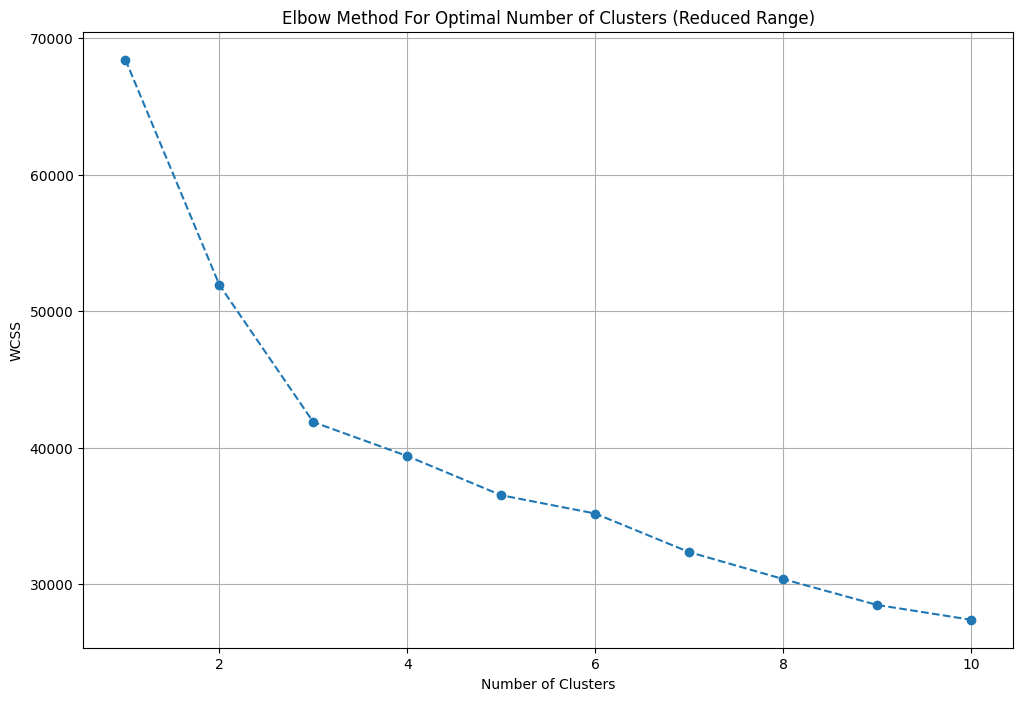

In [63]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [64]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

In [65]:
df = df.iloc[:,:-18]

In [66]:
df['furnishing_type'] = cluster_assignments

In [70]:
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

,furnishDetails,furnishing_type
1612,"['1 Exhaust Fan', '5 Geyser', '1 Stove', '5 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Fan', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",1
3569,[],0
1982,"['5 Fan', '1 Exhaust Fan', '1 Geyser', '10 Light', '5 Curtains', '1 Modular Kitchen', '3 Wardrobe', 'No AC', 'No Bed', 'No Chimney', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",1
1555,[],0
2397,"['1 Water Purifier', '9 Fan', '1 Exhaust Fan', '1 Dining Table', '4 Geyser', '1 Stove', '25 Light', '6 AC', '1 Modular Kitchen', '1 Chimney', '1 Curtains', '3 Bed', '9 Wardrobe', '1 Sofa', '1 Washing Machine', 'No Microwave', 'No Fridge', 'No TV']",2


## 5.features

In [71]:
df[['society','features']].sample(5)

,society,features
560,lavanya apartments,NaN
3744,unitech espace,"['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Fitness Centre / GYM', 'Club house / Community Center']"
1983,independent,"['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Water purifier', 'Park', 'Natural Light', 'Airy Rooms', 'Club house / Community Center']"
192,the lions cghs,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
2190,dlf the arbour,NaN


In [72]:
df['features'].isnull().sum()

635

In [73]:
app_df = pd.read_csv('../../data/raw/appartments.csv')
app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"


In [74]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [75]:
temp_df = df[df['features'].isnull()]

In [76]:
temp_df.shape

(635, 26)

In [77]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [78]:
df.loc[temp_df.index,'features'] = x.values

In [79]:
df['features'].isnull().sum()

481

In [80]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [81]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [82]:
features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
2995,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0
983,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0
3575,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0
842,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2029,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0


In [83]:
features_binary_df.shape

(3802, 130)

In [84]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

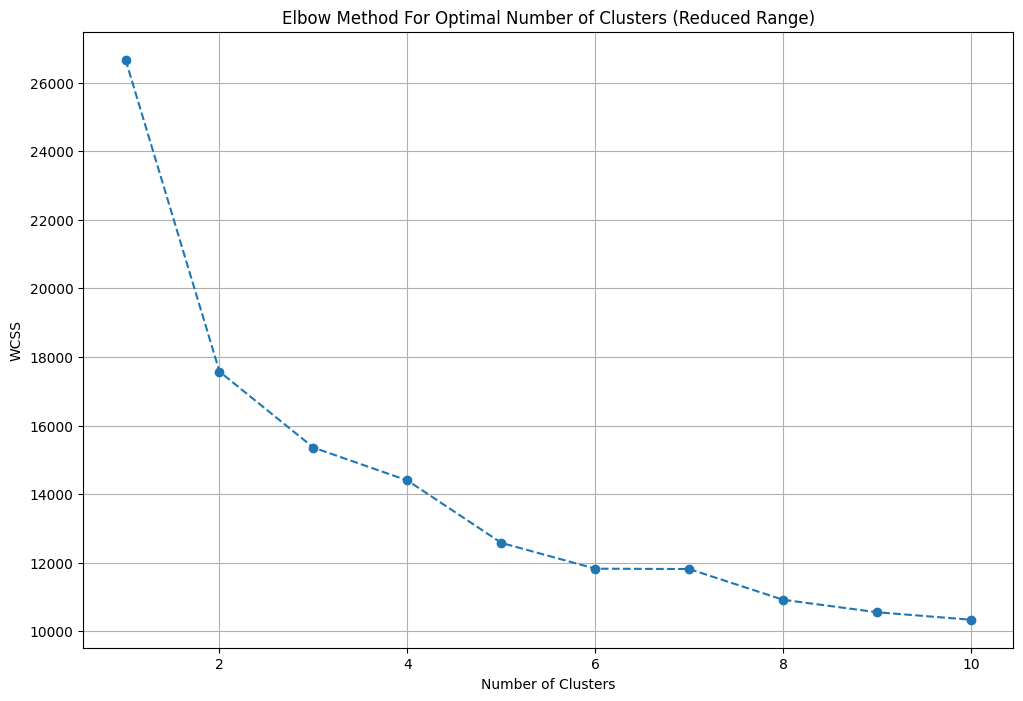

In [85]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [86]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)


In [87]:
df['luxury_score'] = luxury_score

In [88]:
df.head()

,society,price,sector,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,property_type,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,ats marigold,1.7,sector 89,9714.0,1750.0,Carpet area: 1750 (162.58 sq.m.),3.0,3.0,3+,study room,8.0,North,Under Construction,"['Reliance Trends Newtown Square Mall', 'Dwarka Expy, Sector 88', 'Euro Int School, Sector 37D, Gurugram', 'SGT University', 'Genesis Hospital', 'Indira Gandhi Intl Airport']",NaN,"['Power Back-up', 'Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Lift(s)', 'Swimming Pool', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",NaN,NaN,NaN,1750.0,1,0,0,0,0,0,"[Power Back-up, Feng Shui / Vaastu Compliant, Security / Fire Alarm, Lift(s), Swimming Pool, Maintenance Staff, Water Storage, Park, Visitor Parking, Shopping Centre, Fitness Centre / GYM, Club house / Community Center]",65
1,ramprastha skyz,1.2,sector 37d,6000.0,2000.0,Super Built up area 2000(185.81 sq.m.)Built Up area: 1900 sq.ft. (176.52 sq.m.)Carpet area: 1850 sq.ft. (171.87 sq.m.),3.0,2.0,1,"servant room,others",9.0,East,Under Construction,"['Shri Balaji Hospital and Trauma Center', 'Kamla Hospital Gurgaon', 'Shri Multispeciality Hospital', 'Boxer Fuel Point', 'Basai dhankot railway station']",NaN,"['Lift(s)', 'Piped-gas', 'Internet/wi-fi connectivity', 'Park', 'Maintenance Staff', 'Visitor Parking', 'Swimming Pool', 'Security Personnel', 'Fitness Centre / GYM']",NaN,2000.0,1900.0,1850.0,0,1,0,0,1,0,"[Lift(s), Piped-gas, Internet/wi-fi connectivity, Park, Maintenance Staff, Visitor Parking, Swimming Pool, Security Personnel, Fitness Centre / GYM]",53
2,chd avenue,1.3,sector 71,5531.0,2350.0,Super Built up area 2350(218.32 sq.m.),4.0,4.0,3,servant room,5.0,North-East,Moderately Old,"['Huda City Centre', 'Apna Mart', 'Rajiv Chowk', 'Sohna Road', 'IFFCO Chowk', 'Medanta Hospital', 'Max Hospital, Gurugram', 'IGI Airport', 'HDFC Bank', 'Candor Park', 'Marriott Courtyard', 'Radisson Suites', 'Park Plaza', 'Flipkart Warehouse', 'Sadar Police Station']",NaN,"['Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']",NaN,2350.0,NaN,NaN,0,1,0,0,0,0,"[Power Back-up, Feng Shui / Vaastu Compliant, Private Garden / Terrace, Intercom Facility, Lift(s), High Ceiling Height, Maintenance Staff, Water Storage, Separate entry for servant room, No open drainage around, Bank Attached Property, Piped-gas, Visitor Parking, Swimming Pool, Park, Security Personnel, Natural Light, Internet/wi-fi connectivity, Low Density Society, Shopping Centre, Fitness Centre / GYM, Rain Water Harvesting, Club house / Community Center, Water softening plant]",126
3,m3m golfestate,7.0,sector 65,18181.0,3850.0,Carpet area: 3850 (357.68 sq.m.),3.0,3.0,2,store room,12.0,North,Moderately Old,"['Sector 54 Chowk Metro Station', 'Sahara Mall', 'NH 248A', 'Shiksha Bharti Public School', 'Gurugram University', 'Park Hospital', 'Indira Gandhi International Airport', 'Garhi Harsaru Junction', 'Holiday Inn Express Gurugram']","['3 Fan', '6 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Power Back-up', 'Intercom Facili

In [89]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [90]:
df.sample(5)

,society,price,sector,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,property_type,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3555,ats triumph,1.85,sector 104,8078.0,2290.0,Super Built up area 2290(212.75 sq.m.),3.0,3.0,3+,24.0,East,Relatively New,NaN,2290.0,NaN,NaN,0,1,0,0,0,0,174
2232,whiteland the aspen,3.50,sector 76,11917.0,2937.0,Built Up area: 2937 (272.86 sq.m.)Carpet area: 1762 sq.ft. (163.7 sq.m.),3.0,4.0,3,8.0,NaN,Undefined,NaN,NaN,2937.0,1762.0,0,0,0,0,0,0,0
684,vatika inxt floors,1.25,sector 82a,8333.0,1500.0,Carpet area: 1500 (139.35 sq.m.),3.0,2.0,3,2.0,North,Relatively New,NaN,NaN,NaN,1500.0,1,0,0,1,0,1,94
3520,shree vardhman victoria,1.65,sector 70,8461.0,1950.0,Super Built up area 1950(181.16 sq.m.),3.0,4.0,3,12.0,North,Relatively New,NaN,1950.0,NaN,NaN,0,1,1,0,0,0,56
3267,pioneer park,2.00,sector 61,11764.0,1700.0,Super Built up area 1700(157.94 sq.m.),3.0,3.0,3,24.0,North-West,Moderately Old,NaN,1700.0,NaN,NaN,0,0,0,0,0,1,75


In [91]:
df.shape

(3802, 23)

In [92]:
df.to_csv('../../data/processed/gurgaon_properties_cleaned_v2.csv',index=False)